<a href="https://colab.research.google.com/github/harnalashok/timeseries/blob/main/timeseries_components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://analyticsindiamag.com/general-overview-of-time-series-data-analysis/
# https://github.com/marcopeix/TimeSeriesForecastingInPython/blob/master/CH01/CH01.ipynb
# Data source:
# https://www.kaggle.com/datasets/bulentsiyah/for-simple-exercises-time-series-forecasting?resource=download&select=Alcohol_Sales.csv

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
path = "/gdrive/MyDrive/Colab_data_files/timeseries"
path = pathlib.Path(path)

In [9]:
for i in path.iterdir():
  print(i)

/gdrive/MyDrive/Colab_data_files/timeseries/international-airline-passengers.csv.zip
/gdrive/MyDrive/Colab_data_files/timeseries/beerwineliquor.csv
/gdrive/MyDrive/Colab_data_files/timeseries/alcohol_sales.csv
/gdrive/MyDrive/Colab_data_files/timeseries/miles_traveled.csv
/gdrive/MyDrive/Colab_data_files/timeseries/widget_sales.csv
/gdrive/MyDrive/Colab_data_files/timeseries/google.csv
/gdrive/MyDrive/Colab_data_files/timeseries/forecasting at scale prophet.pdf
/gdrive/MyDrive/Colab_data_files/timeseries/shampoo_sales.csv


In [11]:
data = pd.read_csv( path / "alcohol_sales.csv", index_col='DATE')
data.head() 

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [12]:
data.index = pd.to_datetime(data.index) 
data.head() 

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [16]:
data = data.rename(columns = {'S4248SM144NCEN' : "sale"})

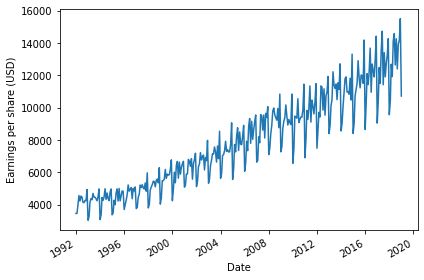

In [23]:
fig, ax = plt.subplots()

ax.plot(data.index, data.sale)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
fig.autofmt_xdate()
plt.tight_layout()


##Time series components

### What is Trend ?

The trend is a pattern in graphs of a time series that shows the movement of the time series. This movement can be observed by the data points of a long period. We can say the trend in any data series if any increasing or decreasing slope is present in the time-series graph. The trend usually comes and goes in any time series; it does not reside in any data set for the whole time. For example, in a time-series data of youtube viral video viewers, the trend will be in time series where the video goes viral once the video gets older, there is no trend in its time series.

The trend can be of three types:
>Increasing: when the general pattern is on an upward slope.<br>
>Decreasing: when the general pattern is on a downward slope.<br>
>Horizontal: when the general pattern is without slope.<br>

###What is Season?

Sometimes a time series dataset may contain a seasonal component. The season is nothing but a variation in data point repeating for time-space or interval. The seasonality can be of different types according to the time zone. Types of seasons are:<br>
Time of day<br>
--------------<br>
>Daily<br>
>Weekly<br>
>Monthly<br>
>Yearly<br>

Identification of the seasonality can help us to understand our time series better. 

### What is a cycle?

The term cycle refers to the recurrent variations in time series that in generally last longer than a year and it can be as many as 15 or 20 years. These variations are regular neither in amplitude nor in length. Most of the time series relating to business exhibit some kind of cyclical or oscillatory variation. These fluctuations are long term movements that represent consistently recurring rises and declines in activity. Seasonal variations are those periodic movements in business activity which occur regularly every year and have their origin in the nature of the year itself. Since these variations repeat during a period of 12 months they can be predicted fairly accurately. Nearly every type of business activity is subject to seasonal influence to a greater or lesser degree and as such these variations are regarded as normal phenomena recurring every year.

## Decomposing time series

In [25]:
advanced_decomposition = STL(data.sale, period=4).fit()

Text(0, 0.5, 'Residuals')

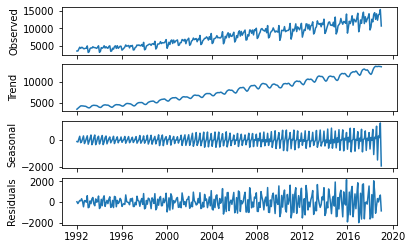

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


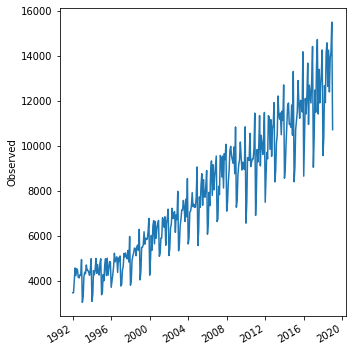

In [30]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(advanced_decomposition.observed)
ax.set_ylabel('Observed')
fig.autofmt_xdate()
plt.tight_layout()

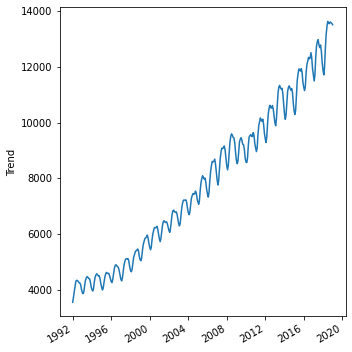

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(advanced_decomposition.trend)
ax.set_ylabel('Trend')
fig.autofmt_xdate()
plt.tight_layout()


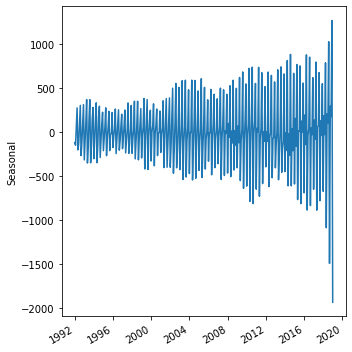

In [34]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
fig.autofmt_xdate()
plt.tight_layout()


##Exercise
Complete all above with jj.csv dataset available [here](https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv)

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [36]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961
...,...,...,...
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980


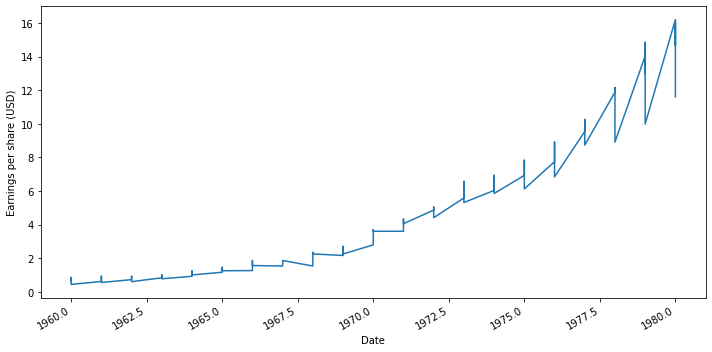

In [42]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df.year, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

#plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
############### I am done #################